# Modelagem

### Bibliotecas

In [2]:
from os import listdir
from pickle import dump
import keras
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
# from keras.applications import  resnet50
# from keras.applications import resnet
# from tensorflow.python.keras.applications.resnet import ResNet50 as resnet50
from tensorflow.keras.applications import ResNet50
from keras.models import Model
import os
from PIL import Image
import pandas as pd

import tqdm
import matplotlib.pyplot as plt
import random 
import tensorflow
import numpy.core.multiarray
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.model_selection import RepeatedStratifiedKFold, LeaveOneOut, StratifiedShuffleSplit

from keras.models import load_model

import sklearn
import subprocess
import time
# import PIL
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')



from lightgbm import LGBMClassifier

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import auc, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution

import time
from sklearn.metrics  import average_precision_score, make_scorer, roc_curve,f1_score, precision_score, recall_score, fbeta_score, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report,precision_recall_curve


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

c:\Anaconda\envs\artigo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Funções auxiliares

In [3]:
def fit_and_print(model, X_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm)                      
    plt.figure(figsize=(8,6))  
    sns.heatmap(cm_df, annot=True)
    print("Classification Report: \n", classification_report(y_test, y_pred))  


    roc_auc = roc_auc_score(y_test, y_pred, multi_class = 'ovr', average=None)
    gini = 2*roc_auc -1
    print("Gini: ",gini)
    print("ROC AUC:: ",roc_auc)
    


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Leitura dos dados

In [4]:
train_normal = pd.read_csv('data/features_train_NORMAL.csv') 
train_pneumonia = pd.read_csv('data/features_train_PNEUMONIA.csv') 
test_normal = pd.read_csv('data/features_test_NORMAL.csv') 
test_pneumonia = pd.read_csv('data/features_test_PNEUMONIA.csv') 
val_normal = pd.read_csv('data/features_val_NORMAL.csv') 
val_pneumonia = pd.read_csv('data/features_val_PNEUMONIA.csv')

In [5]:
train_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.030253e-07,0.000009,0.000017,0.000724,0.000036,1.137662e-06,7.585679e-06,1.365604e-07,4.690241e-07,3.792116e-07,...,3.977842e-07,1.843780e-07,2.469885e-08,8.963966e-09,1.305061e-07,1.066745e-07,6.338824e-07,1.134629e-08,0.000153,0.000870
1,8.543582e-06,0.000136,0.000035,0.002230,0.000114,4.040247e-06,1.052312e-05,4.133533e-05,4.052147e-06,2.338420e-06,...,1.463699e-06,4.915610e-07,3.352001e-07,9.594637e-08,3.922321e-06,1.910834e-06,3.039644e-05,7.112688e-08,0.000108,0.000347
2,4.860348e-07,0.000003,0.000031,0.001357,0.000041,2.204841e-07,3.746792e-07,6.930670e-08,4.367935e-08,6.756602e-08,...,1.171786e-07,6.659896e-09,3.649183e-09,2.374704e-09,2.867081e-08,4.006484e-08,7.181430e-07,6.823269e-09,0.000023,0.000030
3,1.596785e-06,0.000008,0.000004,0.000374,0.000020,4.659951e-08,5.733667e-07,7.739556e-08,7.139975e-08,3.411960e-08,...,6.221602e-08,5.327104e-09,1.708283e-08,7.948706e-10,2.329523e-08,1.155800e-08,3.170211e-07,1.690163e-08,0.000148,0.002563
4,3.259233e-06,0.000032,0.000062,0.006291,0.000078,8.776717e-07,5.650817e-06,2.229028e-05,6.193986e-06,1.380488e-06,...,2.914699e-07,1.114175e-06,5.342975e-07,9.735795e-08,1.374624e-06,4.399171e-07,2.088362e-05,8.871561e-08,0.000017,0.000270


In [6]:
train_normal['Y'] = 0
test_normal['Y'] = 0
val_normal['Y'] = 0
train_pneumonia['Y'] = 1
test_pneumonia['Y'] = 1
val_pneumonia['Y'] = 1

In [7]:
train = pd.concat([train_normal, train_pneumonia], axis=0)
train.shape

(5216, 1001)

In [31]:
train.Y.value_counts()/len(train)

1    0.742906
0    0.257094
Name: Y, dtype: float64

In [8]:
test = pd.concat([test_normal, test_pneumonia], axis=0)
test.shape

(624, 1001)

In [32]:
test.Y.value_counts()/len(test)

1    0.625
0    0.375
Name: Y, dtype: float64

In [9]:
val = pd.concat([val_normal, val_pneumonia], axis=0)
val.shape

(16, 1001)

In [10]:
X_train = train.drop(['Y'], axis=1)
y_train = train.Y

In [11]:
X_test = test.drop(['Y'], axis=1)
y_test = test.Y

In [12]:
X_val = val.drop(['Y'], axis=1)
y_val = val.Y

### Aplicando PCA nos dados

In [185]:
# Standardizing the features
std = StandardScaler()
X_train_2 = std.fit_transform(X_train)
X_test_2 = std.transform(X_test)
X_val_2 = std.transform(X_val)

In [14]:
len(X_test_2[0])

1000

In [186]:
pca = PCA(n_components=400)
X_train_3 = pca.fit_transform(X_train_2)
X_test_3 = pca.transform(X_test_2)
X_val_3 = pca.transform(X_val_2)

In [20]:
len(X_test_3[0])

400

In [21]:
pca.explained_variance_ratio_.sum()

0.906331424796204

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [44]:
RF = RandomForestClassifier(random_state = 35)
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=36)

# metric = "accuracy"
metric = "roc_auc"

RF_search_space = {"bootstrap": Categorical([True]), # values for boostrap can be either True or False
        "criterion": Categorical(["gini", "entropy"]), #"gini"
        "max_depth": Integer(4, 8),
        "max_features": Categorical(['auto', 'sqrt','log2']), 
        "min_samples_leaf": Integer(80, 200),
        "min_samples_split": Integer(200, 350),
        "n_estimators": Integer(20, 80)
    }

### Genetic Algorithm

In [45]:
#https://sklearn-genetic-opt.readthedocs.io/en/stable/api/gasearchcv.html

RF_GA_search = GASearchCV(estimator=RF, param_grid=RF_search_space, return_train_score = True, 
                                    scoring=metric, n_jobs=-1, cv=cv,
                                    population_size=10,
                                    generations=5,
                                    tournament_size=3,
                                    elitism=True,
                                    crossover_probability=0.8,
                                    mutation_probability=0.1,
                                    criteria='max',
                                    algorithm='eaMuPlusLambda',
                                    keep_top_k=4)

inicio = time.time()
RF_GA_search.fit(X_train_3, y_train) # callback=on_step will print score after each iteration
fim = time.time()
print("time train")
print(fim - inicio)
print("Acc")
print(RF_GA_search.best_score_)
RF_best = RF_GA_search.best_estimator_
print(RF_GA_search.best_estimator_)
print(RF_GA_search.best_params_)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.840184	0.0239902  	0.857362   	0.785276   
1  	18    	0.856748	0.00284467 	0.859663   	0.848926   
2  	18    	0.856672	0.00360429 	0.859663   	0.849693   
3  	18    	0.858589	0.00114775 	0.859663   	0.856595   
4  	19    	0.859202	0.000702849	0.859663   	0.858129   
5  	17    	0.859356	0.000613497	0.859663   	0.858129   
time train
183.93131613731384
Acc
0.8596625766871165
RandomForestClassifier(max_depth=8, min_samples_leaf=97, min_samples_split=228,
                       n_estimators=47, random_state=35)
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 97, 'min_samples_split': 228, 'n_estimators': 47}


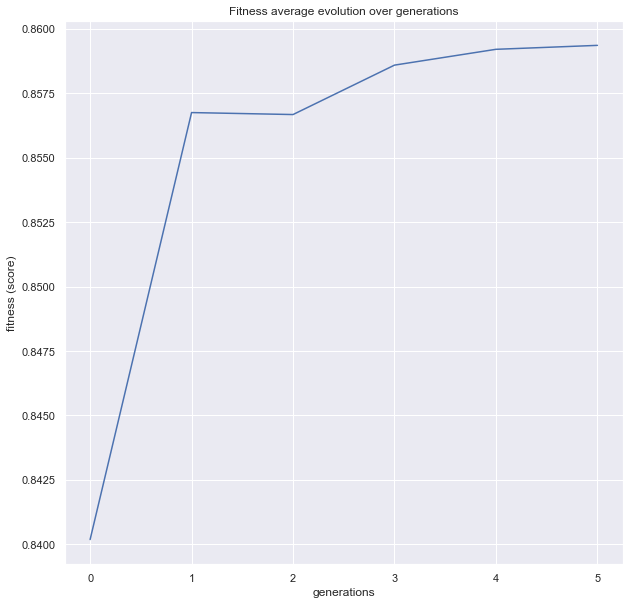

In [46]:
# from sklearn_genetic.plots import plot_fitness_evolution
plot = plot_fitness_evolution(RF_GA_search, metric="fitness")
plt.show()

In [47]:
results = pd.DataFrame(RF_GA_search.cv_results_).sort_values(by = 'rank_test_score')
results.head(3)

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score,rank_train_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params
31,True,entropy,6,auto,80,206,50,0.859663,0.859663,0.0,1,0.875767,0.875767,0.0,1,1.922449,0.0,0.013999,0.0,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
87,True,entropy,6,auto,80,206,50,0.859663,0.859663,0.0,1,0.875767,0.875767,0.0,1,2.135964,0.0,0.013998,0.0,"{'bootstrap': True, 'criterion': 'entropy', 'm..."
71,True,entropy,6,auto,80,206,50,0.859663,0.859663,0.0,1,0.875767,0.875767,0.0,1,1.928364,0.0,0.013911,0.0,"{'bootstrap': True, 'criterion': 'entropy', 'm..."


In [48]:
results_cv2 = pd.DataFrame(RF_GA_search.cv_results_)
results_cv2  = results_cv2[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
# plot_learning_curve_cross_validation(results_cv2, "RF learning curve - GASearchCV")
results_cv2.head()

,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.802147,0.0,0.813650,0.0
1,0.848926,0.0,0.860174,0.0
2,0.857362,0.0,0.874489,0.0
3,0.848160,0.0,0.859407,0.0
4,0.785276,0.0,0.803681,0.0


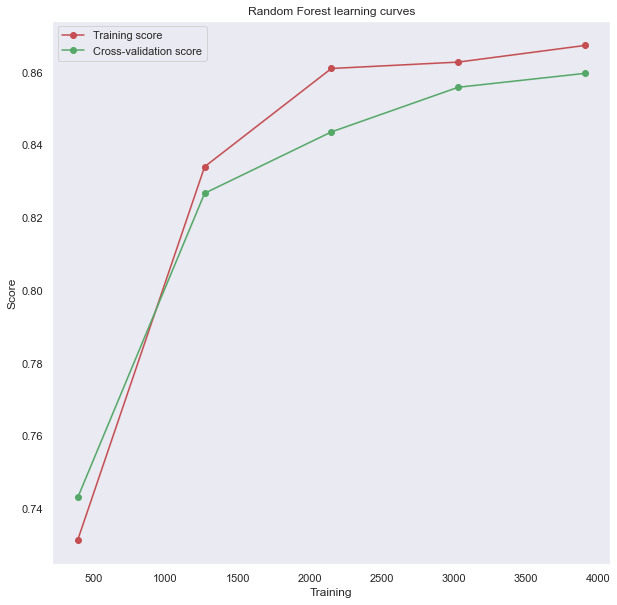

In [49]:
g = plot_learning_curve(RF_best,"Random Forest learning curves",X_train_3, y_train,cv=cv)

In [132]:
y_pred = RF_best.predict_proba(X_train_3)

In [133]:
y_pred 

array([[0.73006456, 0.26993544],
       [0.41697041, 0.58302959],
       [0.91630359, 0.08369641],
       ...,
       [0.13566735, 0.86433265],
       [0.09217352, 0.90782648],
       [0.11446847, 0.88553153]])

In [139]:
inferencia = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])

In [140]:
inferencia['y'] = np.array(y_train)

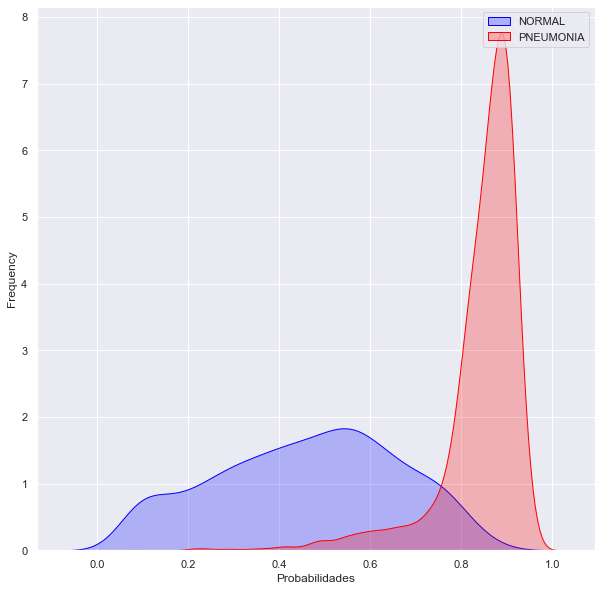

In [141]:
g = sns.kdeplot(inferencia["PNEUMONIA"][(inferencia["y"] == 0) & (inferencia["y"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(inferencia["PNEUMONIA"][(inferencia["y"] == 1) & (inferencia["y"].notnull())], ax =g, color="Red", shade= True)
g.set_xlabel("Probabilidades")
g.set_ylabel("Frequency")
g = g.legend(["NORMAL", "PNEUMONIA"])

In [208]:
y_pred = RF_best.predict_proba(X_train_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.95      0.83      1341
           1       0.98      0.88      0.93      3875

    accuracy                           0.90      5216
   macro avg       0.86      0.92      0.88      5216
weighted avg       0.92      0.90      0.90      5216

Gini:  0.8310980250655504
ROC AUC::  0.9155490125327752


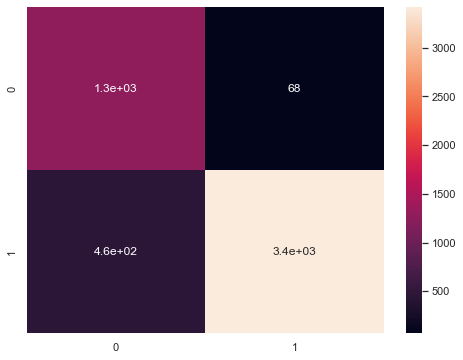

In [209]:
cm = confusion_matrix(y_train, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_train, y_pred_opt))  


roc_auc = roc_auc_score(y_train, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [211]:
confusion_matrix(y_train, y_pred_opt)

array([[1273,   68],
       [ 458, 3417]], dtype=int64)

In [42]:
# fit_and_print(RF_best, X_val)

In [201]:
y_pred = RF_best.predict_proba(X_test_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

In [202]:
y_pred

,NORMAL,PNEUMONIA
0,0.554894,0.445106
1,0.236946,0.763054
2,0.237607,0.762393
3,0.192178,0.807822
4,0.269764,0.730236
...,...,...
619,0.107673,0.892327
620,0.145418,0.854582
621,0.116276,0.883724
622,0.089455,0.910545


In [203]:
y_pred_opt.value_counts()

1    439
0    185
Name: PNEUMONIA, dtype: int64

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66       234
           1       0.78      0.88      0.83       390

    accuracy                           0.77       624
   macro avg       0.76      0.73      0.74       624
weighted avg       0.77      0.77      0.76       624

Gini:  0.4692307692307691
ROC AUC::  0.7346153846153846


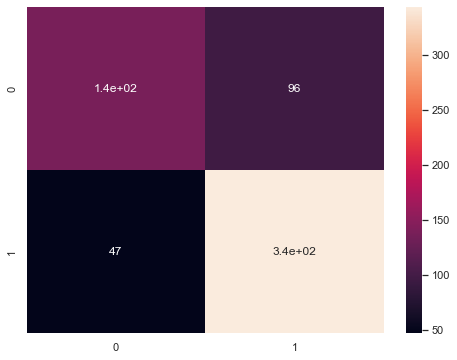

In [204]:
cm = confusion_matrix(y_test, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_test, y_pred_opt))  


roc_auc = roc_auc_score(y_test, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [205]:
confusion_matrix(y_test, y_pred_opt)

array([[138,  96],
       [ 47, 343]], dtype=int64)

base de validação

In [206]:
y_pred = RF_best.predict_proba(X_val_3)
y_pred = pd.DataFrame(y_pred, columns=["NORMAL", "PNEUMONIA"])
y_pred_opt = y_pred.PNEUMONIA.apply(lambda x: 1 if x>=0.77 else 0)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.67      1.00      0.80         8

    accuracy                           0.75        16
   macro avg       0.83      0.75      0.73        16
weighted avg       0.83      0.75      0.73        16

Gini:  0.5
ROC AUC::  0.75


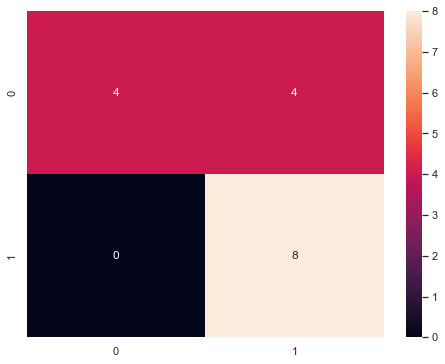

In [207]:
cm = confusion_matrix(y_val, y_pred_opt)
cm_df = pd.DataFrame(cm)                      
plt.figure(figsize=(8,6))  
sns.heatmap(cm_df, annot=True)
print("Classification Report: \n", classification_report(y_val, y_pred_opt))  


roc_auc = roc_auc_score(y_val, y_pred_opt, multi_class = 'ovr', average=None)
gini = 2*roc_auc -1
print("Gini: ",gini)
print("ROC AUC:: ",roc_auc)

In [54]:
import pickle
pickle.dump(pca, open( "pca.pickle", "wb" ))
pickle.dump(std, open( "std.pickle", "wb" ))

import joblib
filename = 'resnet_images.sav'
joblib.dump(RF_best, filename)

['resnet_images.sav']